In [1]:
print("""
@Description: An end-to-end example: A linear classifier in pure TensorFlow
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-26 21:25:25
""")


@Description: An end-to-end example: A linear classifier in pure TensorFlow
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-26 21:25:25



### An end-to-end example: A linear classifier in pure TensorFlow

In [13]:
import tensorflow as tf

In [8]:
import numpy as np
num_samples_per_class = 1_000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, .5], [.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, .5], [.5, 1]], size=num_samples_per_class)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [9]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

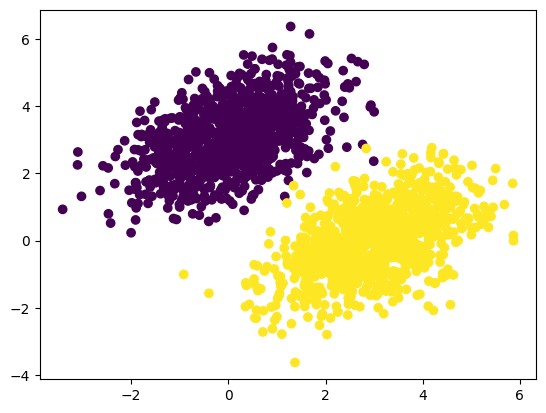

In [11]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [31]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [32]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [33]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.39660442],
       [0.07390857]], dtype=float32)>

In [34]:
tf.matmul(inputs, W)

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[ 0.8382455 ],
       [-0.09808564],
       [-0.40233415],
       ...,
       [ 1.6729048 ],
       [ 0.5574888 ],
       [ 0.5780647 ]], dtype=float32)>

In [35]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [36]:
learning_rate = .1
def training_rate(inputs, targets):
    with tf.GradientTape() as tape:
        # 在一个梯度带作用域内进行一次前向传播
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    # 检索损失相对于权重的梯度
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # 就地更新权重
    W.assign_sub(grad_loss_wrt_w * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [37]:
losses = []
for step in range(40):
    loss = training_rate(inputs, targets)
    losses.append(loss)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 0.2350
Loss at step 1: 0.1127
Loss at step 2: 0.0915
Loss at step 3: 0.0840
Loss at step 4: 0.0787
Loss at step 5: 0.0740
Loss at step 6: 0.0698
Loss at step 7: 0.0660
Loss at step 8: 0.0625
Loss at step 9: 0.0593
Loss at step 10: 0.0563
Loss at step 11: 0.0536
Loss at step 12: 0.0512
Loss at step 13: 0.0490
Loss at step 14: 0.0469
Loss at step 15: 0.0450
Loss at step 16: 0.0433
Loss at step 17: 0.0418
Loss at step 18: 0.0403
Loss at step 19: 0.0390
Loss at step 20: 0.0378
Loss at step 21: 0.0368
Loss at step 22: 0.0358
Loss at step 23: 0.0349
Loss at step 24: 0.0340
Loss at step 25: 0.0333
Loss at step 26: 0.0326
Loss at step 27: 0.0319
Loss at step 28: 0.0314
Loss at step 29: 0.0308
Loss at step 30: 0.0303
Loss at step 31: 0.0299
Loss at step 32: 0.0295
Loss at step 33: 0.0291
Loss at step 34: 0.0288
Loss at step 35: 0.0285
Loss at step 36: 0.0282
Loss at step 37: 0.0279
Loss at step 38: 0.0277
Loss at step 39: 0.0275


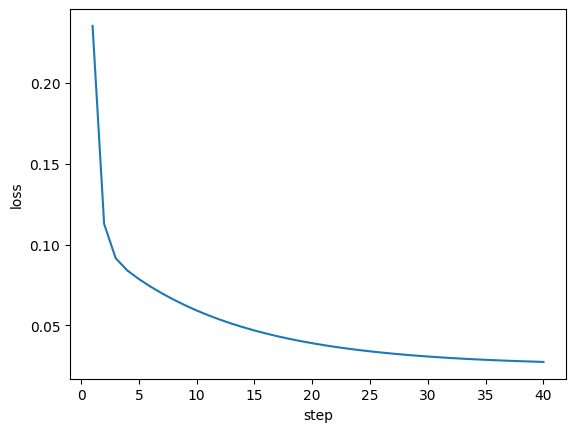

In [42]:
plt.plot(range(1, 41), losses)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

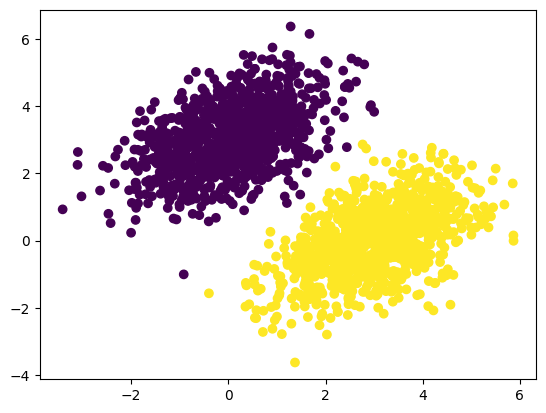

In [45]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > .5)
plt.show()

分类器的判别平面为：
\begin{equation}
\begin{aligned}
0.5&=w_1*x_1 + w_2*x_2+b\\
x_2&=-\frac{w_1}{w_2}*x_1+\frac{0.5-b}{w_2}\\
\end{aligned}
\end{equation}

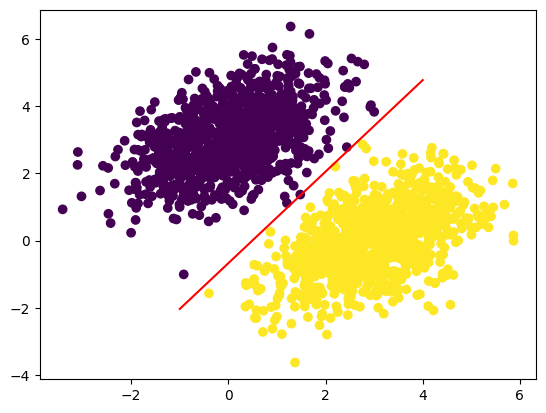

In [47]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > .5)
plt.show()